In [1]:
import os
import imageio 
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from datetime import datetime
import pandas as pd

from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
os.chdir('D:/Solar System/')


In [2]:
# Rename all the fits file in order
# import os
# os.chdir('D:/Solar System/data_fit')
# i=1
# for file in os.listdir():
#     src=file
#     new_name="6 Hebe-Bin2-"+str(i)+"L"+".fit"
#     os.rename(src,new_name)
#     i+=1

In [3]:
fits_files = []
for i in range(1,45):
    fits_files.append(f'data_fit/6 Hebe-Bin2-{i}L.fit')
print(fits_files)

['data_fit/6 Hebe-Bin2-1L.fit', 'data_fit/6 Hebe-Bin2-2L.fit', 'data_fit/6 Hebe-Bin2-3L.fit', 'data_fit/6 Hebe-Bin2-4L.fit', 'data_fit/6 Hebe-Bin2-5L.fit', 'data_fit/6 Hebe-Bin2-6L.fit', 'data_fit/6 Hebe-Bin2-7L.fit', 'data_fit/6 Hebe-Bin2-8L.fit', 'data_fit/6 Hebe-Bin2-9L.fit', 'data_fit/6 Hebe-Bin2-10L.fit', 'data_fit/6 Hebe-Bin2-11L.fit', 'data_fit/6 Hebe-Bin2-12L.fit', 'data_fit/6 Hebe-Bin2-13L.fit', 'data_fit/6 Hebe-Bin2-14L.fit', 'data_fit/6 Hebe-Bin2-15L.fit', 'data_fit/6 Hebe-Bin2-16L.fit', 'data_fit/6 Hebe-Bin2-17L.fit', 'data_fit/6 Hebe-Bin2-18L.fit', 'data_fit/6 Hebe-Bin2-19L.fit', 'data_fit/6 Hebe-Bin2-20L.fit', 'data_fit/6 Hebe-Bin2-21L.fit', 'data_fit/6 Hebe-Bin2-22L.fit', 'data_fit/6 Hebe-Bin2-23L.fit', 'data_fit/6 Hebe-Bin2-24L.fit', 'data_fit/6 Hebe-Bin2-25L.fit', 'data_fit/6 Hebe-Bin2-26L.fit', 'data_fit/6 Hebe-Bin2-27L.fit', 'data_fit/6 Hebe-Bin2-28L.fit', 'data_fit/6 Hebe-Bin2-29L.fit', 'data_fit/6 Hebe-Bin2-30L.fit', 'data_fit/6 Hebe-Bin2-31L.fit', 'data_fit/6 Hebe

In [4]:
fits_data=[]
datetimes=[]
for fits_file in fits_files:
    file=fits.open(fits_file)
    image_data=file[0].data
    header=file[0].header
    time= pd.to_datetime(header['DATE-OBS'])
    datetimes.append(time)
    fits_data.append(image_data)

In [5]:
file[0].header #Let's the header of the last fit file

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 3124 /fastest changing axis                           
NAXIS2  =                 2088 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2024-05-07T18:38:43.56' /YYYY-MM-DDThh:mm:ss observation, UT         
EXPTIME =   30.000000000000000 /Exposure time in seconds                        
EXPOSURE=   30.000000000000000 /Exposure time in seconds                        
SET-TEMP=   0.0000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP= -0.10000000000000001 /CCD temperature at start of exposure in C       
XPIXSZ  =   7.51999999999999

In [6]:
# # Create images
# filenames=[]
# for i in range(0,44):
#     fig = plt.figure(figsize=(12,8),dpi=150)
#     plt.imshow(fits_data[i], cmap='grey',norm=LogNorm(vmin=fits_data[i].min()*1.1, vmax=fits_data[i].min()*1.39))
#     plt.axis(False)

#     filename=f'images/figure{i+1}.png'
#     filenames.append(filename)
#     fig.savefig(filename,bbox_inches='tight')

#     plt.close('all')

In [7]:
# # Create .gif file
# with imageio.get_writer('my_animation.gif',fps=2) as writer:
#     for filename in filenames:
#         image=imageio.v2.imread(filename)
#         writer.append_data(image)

In [8]:
# Create a function to find the pixel position of the 6 Hebe and one background star 
def find_star(image):
    mean, median, std = sigma_clipped_stats(image, sigma=3.0)  
    daofind = DAOStarFinder(fwhm=8, threshold=5.*std)  # define the full width half maximum and threshold 
    sources = daofind(image - median) 
    sources.sort('peak', reverse=True)
    return [sources[0]['xcentroid'], sources[0]['ycentroid']], [sources[1]['xcentroid'], sources[1]['ycentroid']]

In [9]:
# We found that with the indices of 18, 20, 28, 29 in fits_data, the function find_star would be indicate the difference background star, so we should ignore them.
rel_pos=[]
exclude_values = [18,19, 20, 21, 28, 29,30]
star1=find_star(fits_data[0])
for i in range(1,44):
    if i in exclude_values:
        continue  
    pos_star1= find_star(fits_data[i-1])
    pos_star2= find_star(fits_data[i])
    
    rel=[pos_star2[0][0]-(pos_star2[1][0]-pos_star1[1][0]), pos_star2[0][1]-(pos_star2[1][1]-pos_star1[1][1])]
    rel_pos.append(rel)
rel_pos.insert(0,star1[0])

In [10]:
# Remove the corresponding datetime values of the excluded values
datetimes = [dt for i, dt in enumerate(datetimes) if i not in exclude_values]

(<matplotlib.patches.Circle at 0x18e041469f0>,)

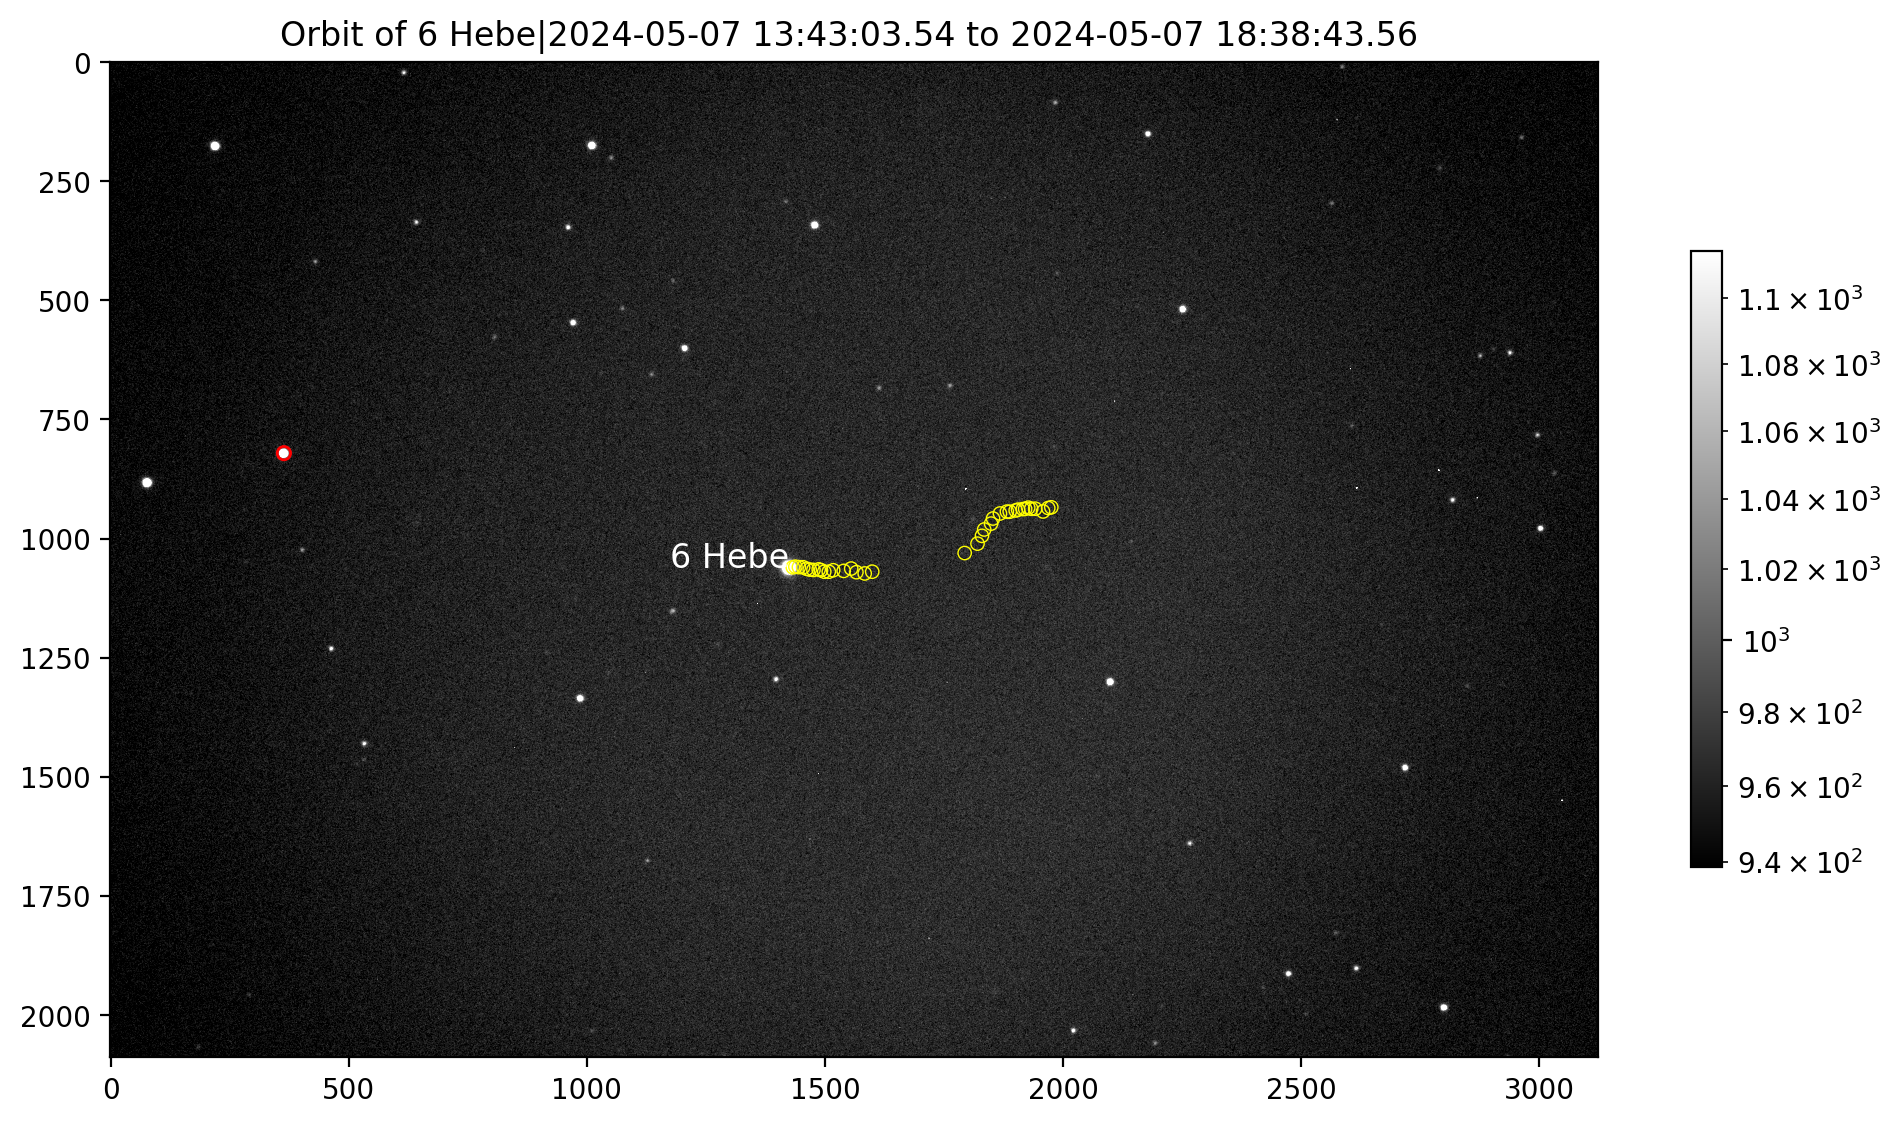

In [11]:
# PLot the orbit of the 6 Hebe asteroid relative to the background star
plt.figure(figsize=(12,8),dpi=200)
for i in range(1,37):
    aperture= CircularAperture(rel_pos[i],r=14)
    aperture.plot(color='yellow', lw=0.5)
plt.imshow(fits_data[0] ,cmap='grey',norm=LogNorm(vmin=fits_data[0].min()*1.12, vmax=fits_data[0].min()*1.33))
plt.text(star1[0][0], star1[0][1], '6 Hebe', color='white', fontsize=12, ha='right')
plt.colorbar(shrink=0.5)
plt.title('Orbit of 6 Hebe|2024-05-07 13:43:03.54 to 2024-05-07 18:38:43.56 ')
CircularAperture(star1[1],r=14).plot(color='red', lw=1) # The background star

In [12]:
pixel_size=  7.5199999999999996 # From from the header (micrometer)
foc= 3960 # focal length (mm)
# Calculate the sensor size of the camera
sensor_size = [1e-3*pixel_size* i for i in fits_data[0].shape] # [sensor height, sensor width]  (mm)
sensor_size

[15.70176, 23.49248]

In [13]:
# Calculate the field of view
fov=57.3/foc*sensor_size[1]
fov

0.33992906666666667

In [14]:
pixel_dist=[]  # The pixel distance between two positions of 6 Hebe in time (pixels)
velocity=[]  # The velocity (rad/s)
ang_dist=[]     # Angular distance (rad)

# Determine all the value
for i in range(1,37):
    dist=np.sqrt((rel_pos[i][0]-rel_pos[i-1][0])**2+(rel_pos[i][1]-rel_pos[i-1][1])**2)
    pixel_dist.append(dist)

    ang=dist*pixel_size*206.265*0.000277778*(1/foc) # in decimal degree
    ang_dist.append(ang)

    vel= ang/(datetimes[i]-datetimes[i-1]).total_seconds()
    velocity.append(vel)
    

In [15]:
# Shift to the data frame
pd.set_option('display.float_format', '{:.6e}'.format)
df=pd.DataFrame({'Distance move (decimal deg)':ang_dist, 'Velocity (rad/s)':velocity})
df.head()

,Distance move (decimal deg),Velocity (rad/s)
0,8.257756e-04,2.419784e-06
1,5.949055e-04,1.743977e-06
2,8.160053e-04,2.392135e-06
3,9.625308e-04,2.820769e-06
4,8.679170e-04,2.544241e-06


In [16]:
df.describe()

,Distance move (decimal deg),Velocity (rad/s)
count,3.600000e+01,3.600000e+01
mean,1.834197e-03,3.318676e-06
std,3.441978e-03,2.023827e-06
min,5.279533e-04,1.433502e-06
25%,8.009782e-04,2.116699e-06
50%,1.079482e-03,2.519143e-06
75%,1.771348e-03,3.776927e-06
max,2.154448e-02,1.064492e-05
